In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/train-chennai-sale.csv')

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
correlation = df.corr()
sales_corr = correlation['SALES_PRICE']
sales_corr

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330999
N_BATHROOM       0.108884
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.020556
REG_FEE          0.878148
COMMIS           0.626275
SALES_PRICE      1.000000
Name: SALES_PRICE, dtype: float64

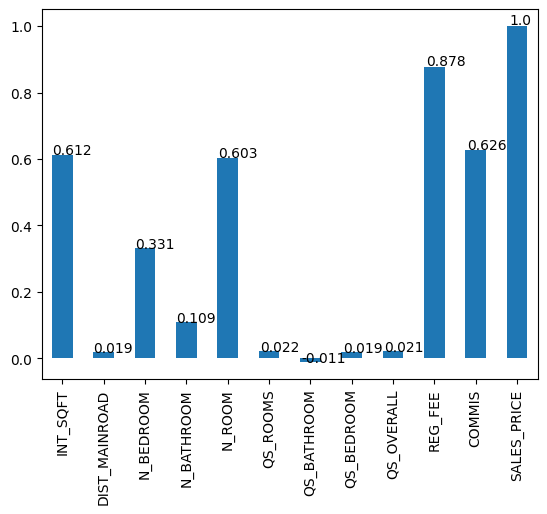

In [7]:
sales_corr_plot = sales_corr.plot(kind='bar')
for p in sales_corr_plot.patches:
    sales_corr_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [8]:
# Will drop columns with corr < 0.1 , columns are ['QS_BATHROOM','QS_BEDROOM','QS_OVERALL','QS_ROOMS','DIST_MAINROAD']

In [9]:
df = df.drop(columns=['QS_BATHROOM','QS_BEDROOM','QS_OVERALL','QS_ROOMS','DIST_MAINROAD'])

In [10]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,237000,74063,7406250


In [11]:
# Get the AGE of house

In [12]:
df['House_Age'] = pd.to_datetime(df['DATE_SALE']) - pd.to_datetime(df['DATE_BUILD'])
df['House_Age'] = ((df['House_Age'] / np.timedelta64(1, 'D')).astype(int)/365).round().astype(int) 

In [13]:
df['House_Age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    29
7107    31
7108    44
Name: House_Age, Length: 7109, dtype: int32

In [14]:
# Dropping DATE_BUILD and DATE_SALE
df = df.drop(columns=['DATE_SALE', 'DATE_BUILD'])
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'House_Age'],
      dtype='object')

In [15]:
# Removing the leading spaces in string values
for col in df.columns:
    if type(df[col][0]) == str:
        print(col)
        df[col] = df[col].apply(lambda x : x.strip())

PRT_ID
AREA
SALE_COND
PARK_FACIL
BUILDTYPE
UTILITY_AVAIL
STREET
MZZONE


In [16]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'House_Age'],
      dtype='object')

<AxesSubplot: >

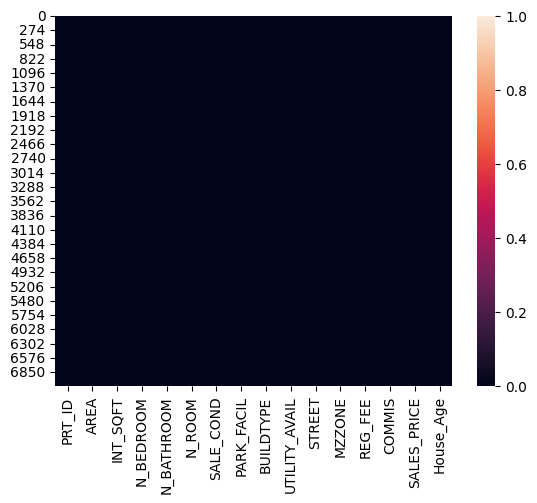

In [17]:
sns.heatmap(df.isna())

## checking for null values

In [18]:
print(df.isna().any())

PRT_ID           False
AREA             False
INT_SQFT         False
N_BEDROOM         True
N_BATHROOM        True
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
MZZONE           False
REG_FEE          False
COMMIS           False
SALES_PRICE      False
House_Age        False
dtype: bool


In [19]:
df[df['N_BATHROOM'].isna() == True]

,PRT_ID,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House_Age
70,P05304,Anna Nagar,1589,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,451857,85486,12212350,44
5087,P01333,Chrompet,1016,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,330086,106479,10647920,31
6134,P01332,Chormpet,916,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,265423,44237,8847420,37
6371,P01189,Chrompet,1035,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,223403,24823,8274200,31
6535,P09189,Anna Nagar,1864,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,575606,124455,15556920,10


In [20]:
df[df['N_BEDROOM'].isna() == True]

,PRT_ID,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House_Age
4060,P01066,Anna Nagar,1556,NaN,1.0,4,Partiall,No,House,NoSewr,No Access,RM,313136,107978,10797790,27


In [21]:
len(df)

7109

# After dropping the entries that contains null values, the size of df should be 7109 - 6 = 7103

In [22]:
df = df.dropna()
df = df.reset_index(drop=True)

In [23]:
df

,PRT_ID,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House_Age
0,P03210,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,760122,304049,21717770,11
2,P01812,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,20
3,P05346,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,356321,77042,9630290,22
4,P06210,Karapakkam,1226,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,P03834,Karapakkam,598,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,208767,107060,5353000,49
7099,P10000,Velachery,1897,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,346191,205551,10818480,9
7100,P09594,Velachery,1614,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,317354,167028,8351410,29
7101,P06508,Karapakkam,787,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,425350,119098,8507000,31


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7103 non-null   object 
 1   AREA           7103 non-null   object 
 2   INT_SQFT       7103 non-null   int64  
 3   N_BEDROOM      7103 non-null   float64
 4   N_BATHROOM     7103 non-null   float64
 5   N_ROOM         7103 non-null   int64  
 6   SALE_COND      7103 non-null   object 
 7   PARK_FACIL     7103 non-null   object 
 8   BUILDTYPE      7103 non-null   object 
 9   UTILITY_AVAIL  7103 non-null   object 
 10  STREET         7103 non-null   object 
 11  MZZONE         7103 non-null   object 
 12  REG_FEE        7103 non-null   int64  
 13  COMMIS         7103 non-null   int64  
 14  SALES_PRICE    7103 non-null   int64  
 15  House_Age      7103 non-null   int32  
dtypes: float64(2), int32(1), int64(5), object(8)
memory usage: 860.3+ KB


In [25]:
df['PRT_ID'].nunique()

7103

In [26]:
# A string data with 7103 uunique entries can be dropped , since ID doesn't play any role as a deciding factor in sale price

In [27]:
df = df.drop(columns=['PRT_ID'])

In [28]:
for i,j in enumerate(df.columns):
    print(i, j, df[j].unique() if df[j].nunique() < 20 else None)
    print()

0 AREA ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

1 INT_SQFT None

2 N_BEDROOM [1. 2. 3. 4.]

3 N_BATHROOM [1. 2.]

4 N_ROOM [3 5 4 2 6]

5 SALE_COND ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

6 PARK_FACIL ['Yes' 'No' 'Noo']

7 BUILDTYPE ['Commercial' 'Others' 'Other' 'House' 'Comercial']

8 UTILITY_AVAIL ['AllPub' 'ELO' 'NoSewr' 'NoSeWa' 'All Pub']

9 STREET ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

10 MZZONE ['A' 'RH' 'RL' 'I' 'C' 'RM']

11 REG_FEE None

12 COMMIS None

13 SALES_PRICE None

14 House_Age None



### Cleaning the data in each column and Uni-Variate Plots

In [29]:
# The 'AREA' column needs cleaning since some duplicate names are present in it

In [30]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [31]:
df['AREA'].replace({
    'Karapakam':'Karapakkam',
    'Ana Nagar':'Anna Nagar',
    'Ann Nagar':'Anna Nagar',
    'Adyr'     :'Adyar',
    'Velachery':'Velchery',
    'Chormpet' :'Chrompet',
    'Chrompt' :'Chrompet',
    'Chrmpet'  :'Chrompet',
    'TNagar'   : 'T Nagar',
    'KKNagar'  :'KK Nagar'
}).unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velchery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [32]:
df['AREA'].replace({
    'Karapakam':'Karapakkam',
    'Ana Nagar':'Anna Nagar',
    'Ann Nagar':'Anna Nagar',
    'Adyr'     :'Adyar',
    'Velachery':'Velchery',
    'Chormpet' :'Chrompet',
    'Chrompt' :'Chrompet',
    'Chrmpet'  :'Chrompet',
    'TNagar'   : 'T Nagar',
    'KKNagar'  :'KK Nagar'
}, inplace=True)

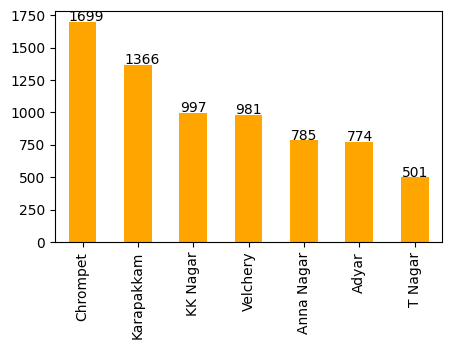

In [33]:
plt.figure(figsize=(5,3))
area_plot = df['AREA'].value_counts().plot(kind='bar',color='orange')
for p in area_plot.patches:
    area_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [34]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [35]:
df['SALE_COND'].replace({
    'Ab Normal':'AbNormal',
    'Partiall':'Partial',
    'PartiaLl':'Partial',
    'AdjLand':'Adj Land'
}).unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [36]:
df['SALE_COND'].replace({
    'Ab Normal':'AbNormal',
    'Partiall':'Partial',
    'PartiaLl':'Partial',
    'AdjLand':'Adj Land'
}, inplace=True)

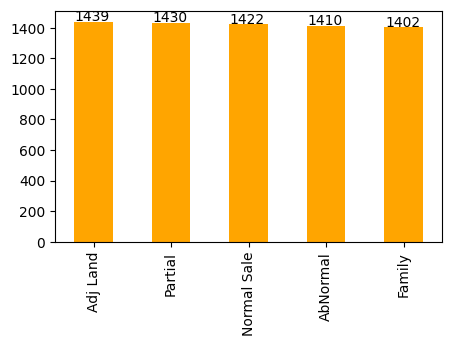

In [37]:
plt.figure(figsize=(5,3))
sale_condition_plot = df['SALE_COND'].value_counts().plot(kind='bar',color='orange')
for p in sale_condition_plot.patches:
    sale_condition_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [38]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [39]:
df['PARK_FACIL'].replace({'Noo':'No'}, inplace=True)

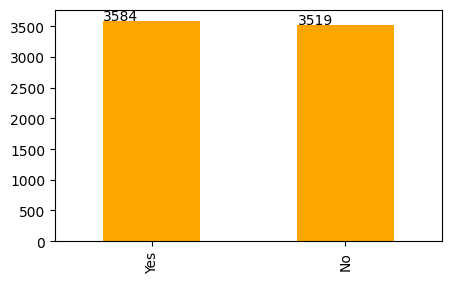

In [40]:
plt.figure(figsize=(5,3))
park_facility_plot = df['PARK_FACIL'].value_counts().plot(kind='bar',color='orange')
for p in park_facility_plot.patches:
    park_facility_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [41]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [42]:
df['BUILDTYPE'].replace({
    'Comercial':'Commercial',
    'Other':'Others'
}).unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [43]:
df['BUILDTYPE'].replace({
    'Comercial':'Commercial',
    'Other':'Others'
}, inplace=True)

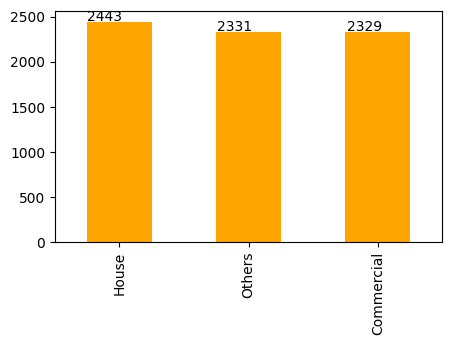

In [44]:
plt.figure(figsize=(5,3))
buildType_plot = df['BUILDTYPE'].value_counts().plot(kind='bar',color='orange')
for p in buildType_plot.patches:
    buildType_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [45]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa', 'All Pub'], dtype=object)

In [46]:
df['UTILITY_AVAIL'].replace({
    'AllPub':'All Pub',
    'NoSewr':'NoSeWa'
}).unique()

array(['All Pub', 'ELO', 'NoSeWa'], dtype=object)

In [47]:
df['UTILITY_AVAIL'].replace({
    'AllPub':'All Pub',
    'NoSewr':'NoSeWa'
}, inplace=True)

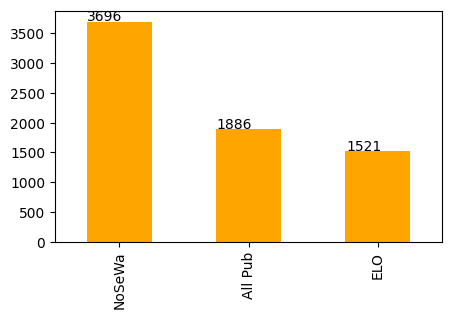

In [48]:
plt.figure(figsize=(5,3))
utility_avail_plot = df['UTILITY_AVAIL'].value_counts().plot(kind='bar',color='orange')
for p in utility_avail_plot.patches:
    utility_avail_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [49]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [50]:
df['STREET'].replace({
    'Pavd':'Paved',
    'NoAccess':'No Access'
}).unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [51]:
df['STREET'].replace({
    'Pavd':'Paved',
    'NoAccess':'No Access'
}, inplace=True)

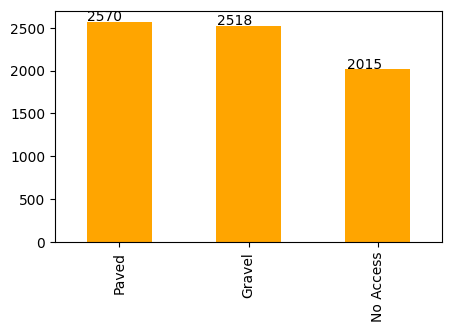

In [52]:
plt.figure(figsize=(5,3))
street_plot = df['STREET'].value_counts().plot(kind='bar',color='orange')
for p in street_plot.patches:
    street_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [53]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

## Multivariate Plots w.r.t to Sales price

In [54]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'House_Age'],
      dtype='object')

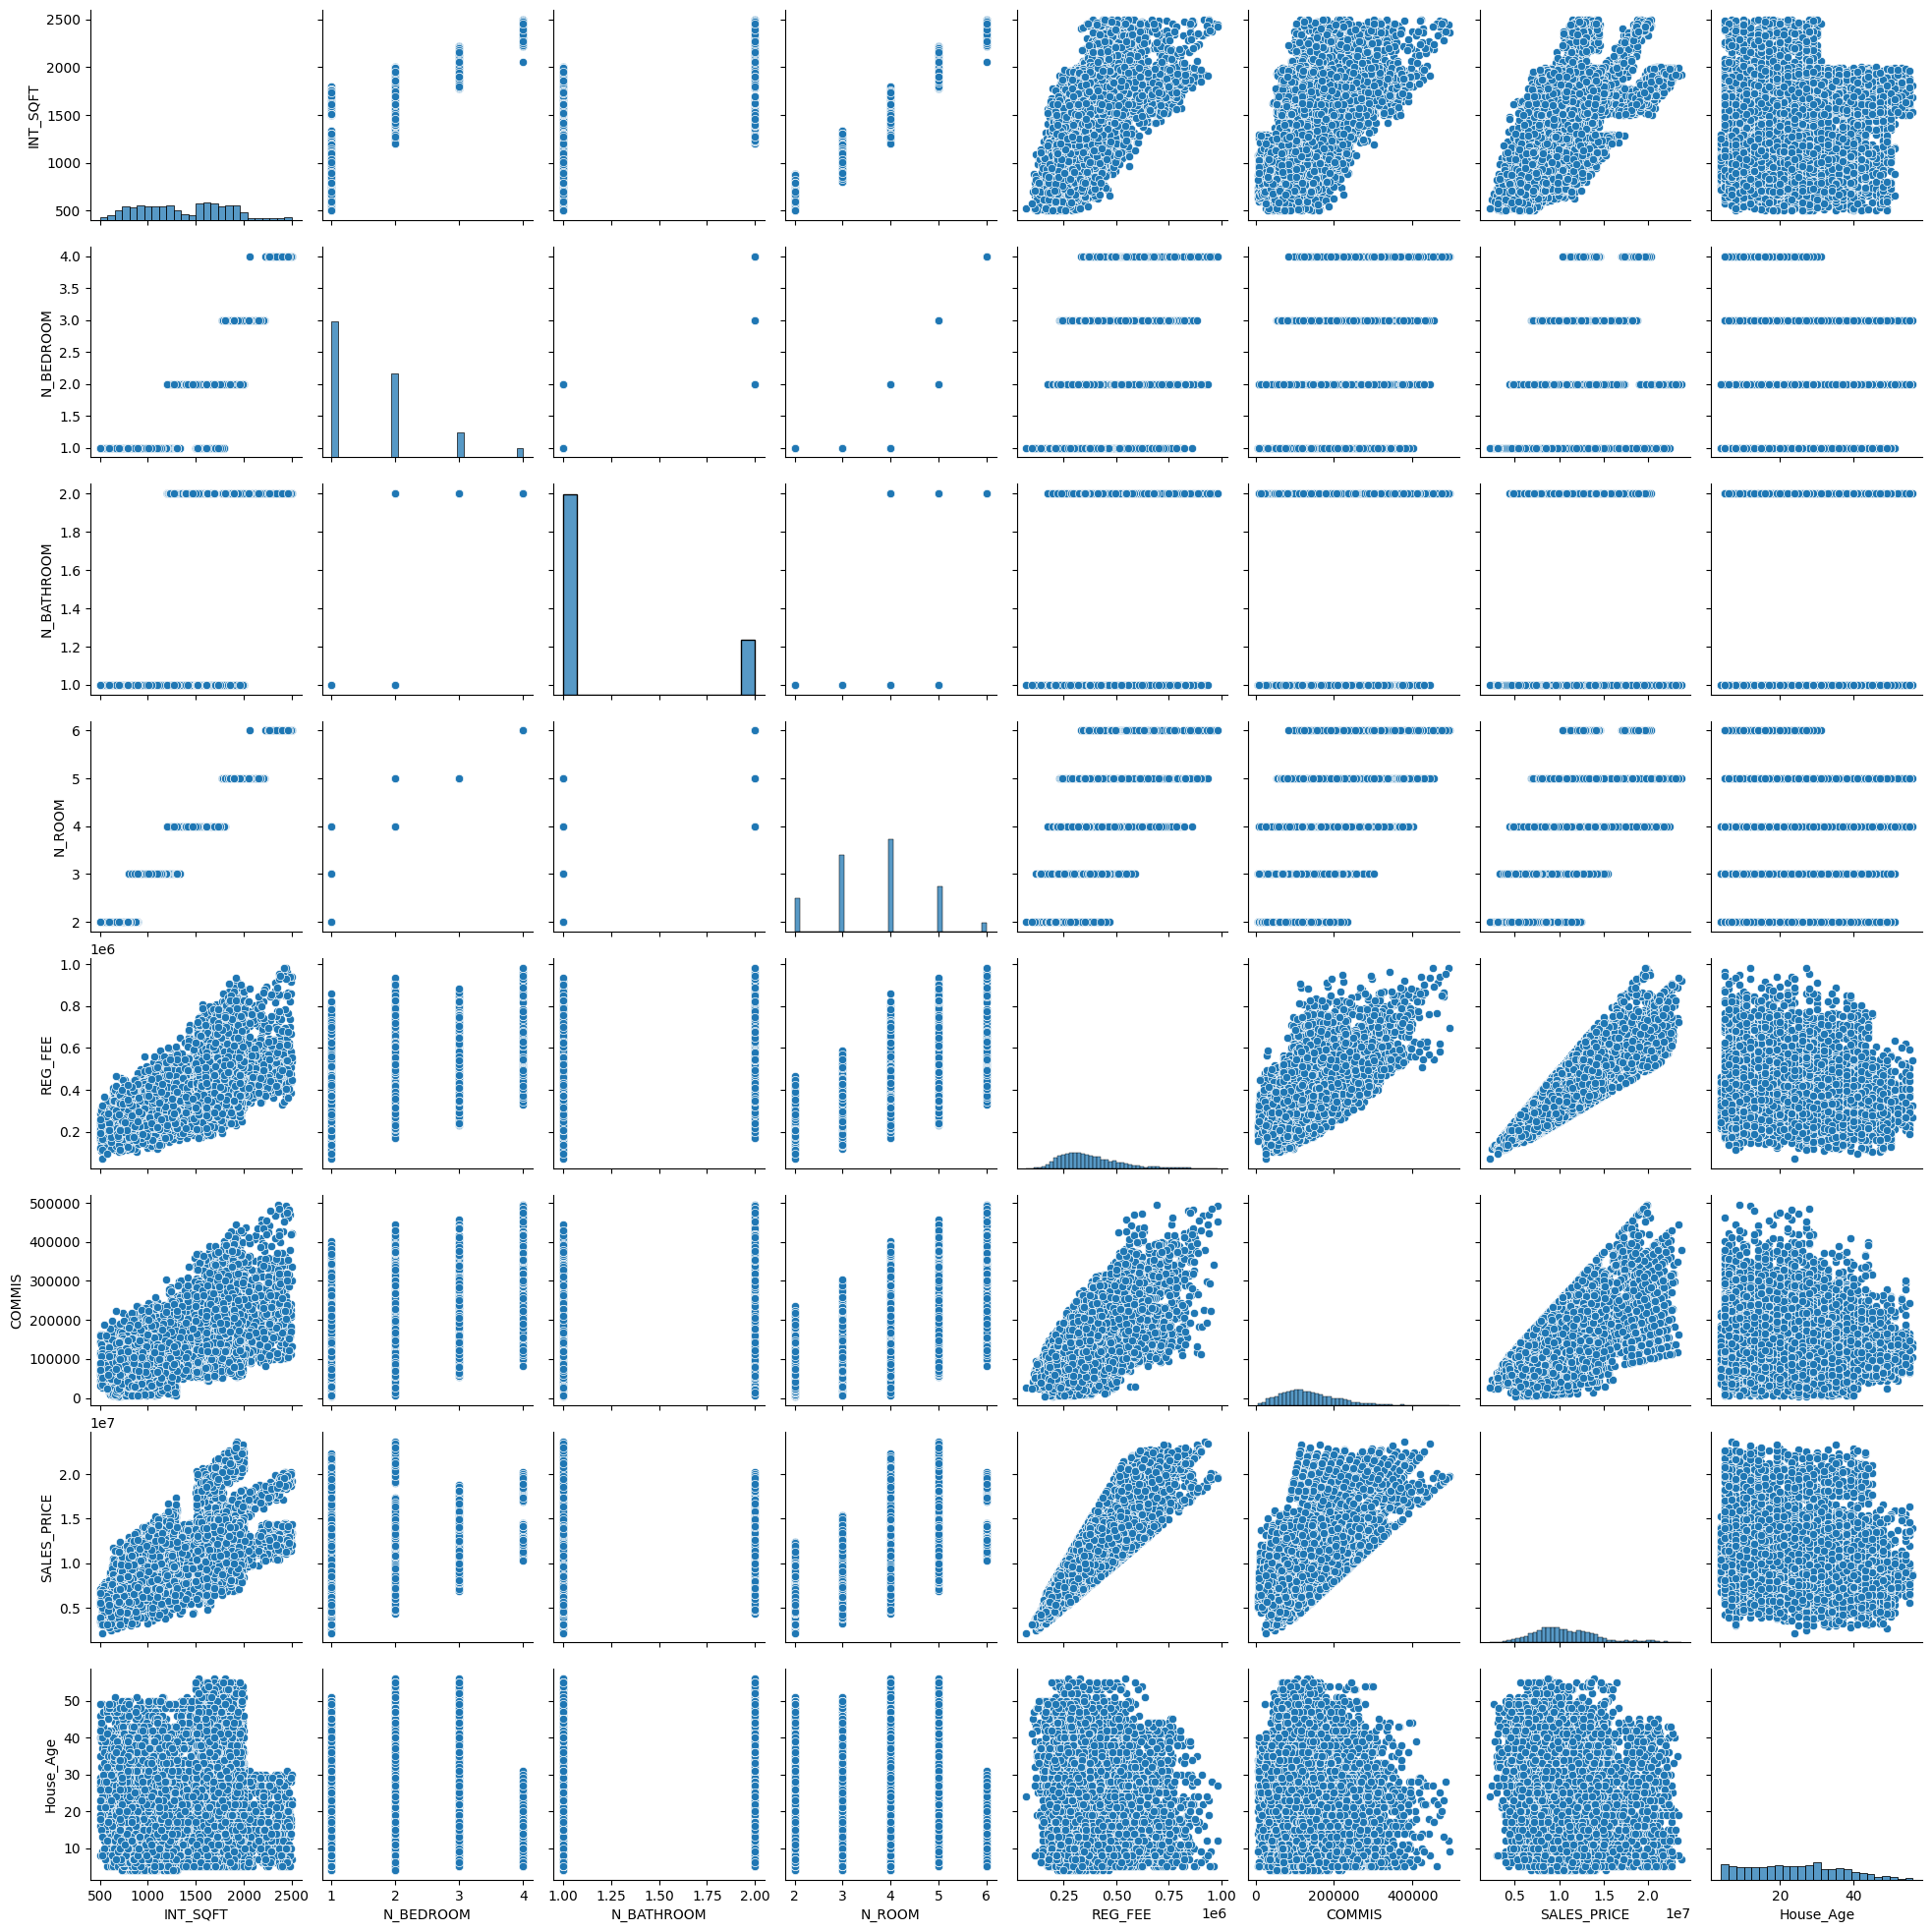

In [55]:
sns.pairplot(df)

Text(0.5, 1.0, 'SPACE OCCUPIED (INF_SQT) Vs SALES_PRICE')

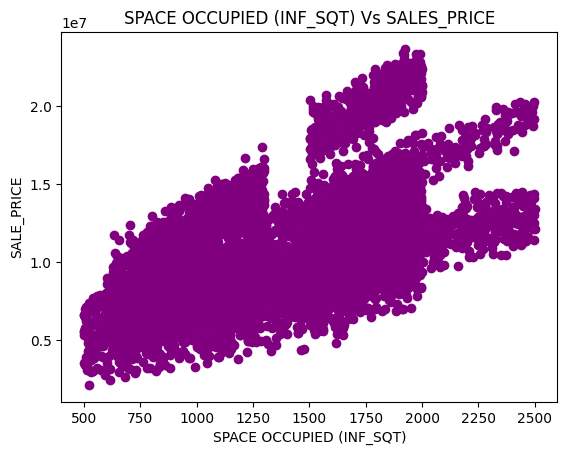

In [56]:
plt.scatter(df['INT_SQFT'], df['SALES_PRICE'], color='purple')
plt.xlabel('SPACE OCCUPIED (INF_SQT)')
plt.ylabel('SALE_PRICE')
plt.title('SPACE OCCUPIED (INF_SQT) Vs SALES_PRICE')
# plt.plot()

Text(0.5, 1.0, 'BATHROOM Vs SALES_PRICE')

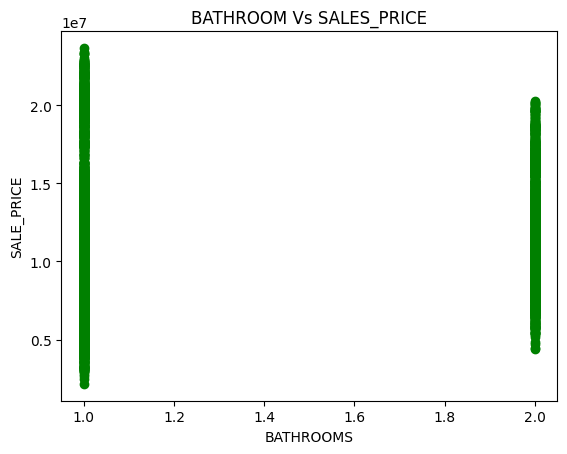

In [57]:

plt.scatter(df['N_BATHROOM'], df['SALES_PRICE'], color='g')
plt.xlabel('BATHROOMS')
plt.ylabel('SALE_PRICE')
plt.title('BATHROOM Vs SALES_PRICE')
# plt.plot()

Text(0.5, 1.0, 'BEDROOM Vs SALES_PRICE')

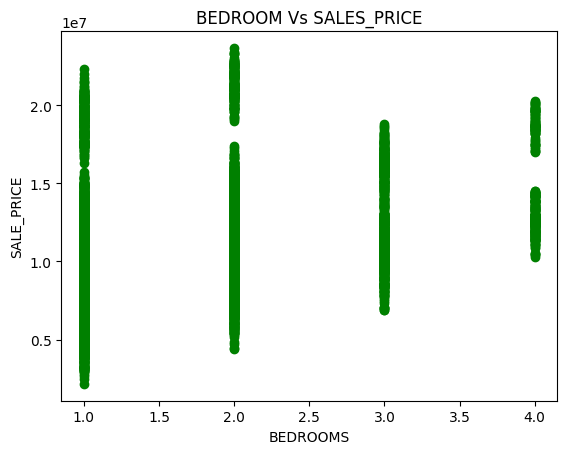

In [58]:
plt.scatter(df['N_BEDROOM'], df['SALES_PRICE'], color='g')
plt.xlabel('BEDROOMS')
plt.ylabel('SALE_PRICE')
plt.title('BEDROOM Vs SALES_PRICE')
# plt.plot()

Text(0.5, 1.0, 'ROOMS Vs SALES_PRICE')

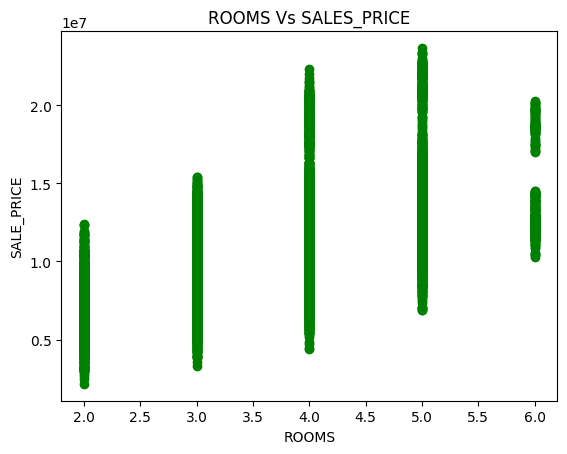

In [59]:
plt.scatter(df['N_ROOM'], df['SALES_PRICE'], color='g')
plt.xlabel('ROOMS')
plt.ylabel('SALE_PRICE')
plt.title('ROOMS Vs SALES_PRICE')
# plt.plot()

Text(0.5, 1.0, 'COMMISION Vs SALES_PRICE')

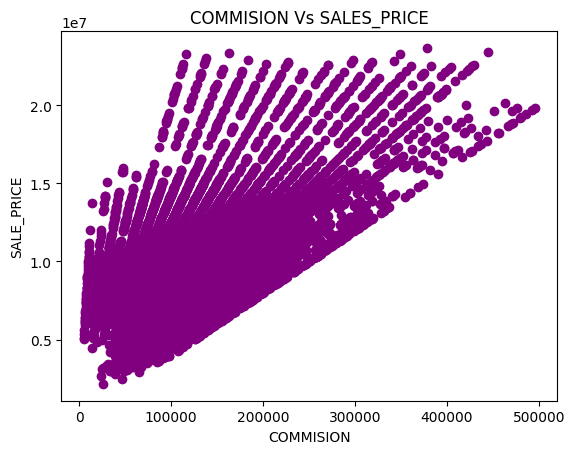

In [60]:
plt.scatter(x=df['COMMIS'], y=df['SALES_PRICE'], color='purple')
plt.xlabel('COMMISION')
plt.ylabel('SALE_PRICE')
plt.title('COMMISION Vs SALES_PRICE')
# plt.plot()

Text(0.5, 1.0, 'REG_FEE Vs SALES_PRICE')

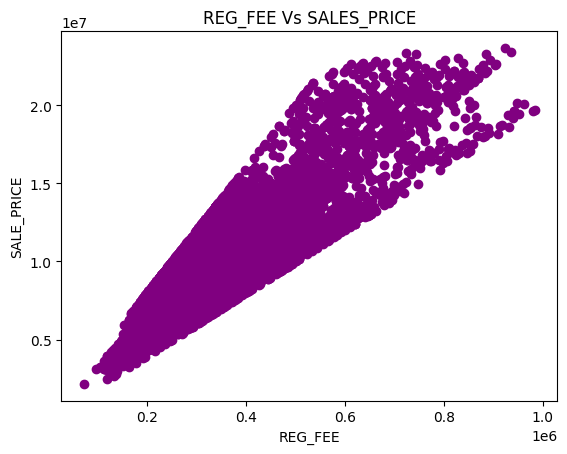

In [61]:
plt.scatter(x=df['REG_FEE'], y=df['SALES_PRICE'], color='purple')
plt.xlabel('REG_FEE')
plt.ylabel('SALE_PRICE')
plt.title('REG_FEE Vs SALES_PRICE')
# plt.plot()

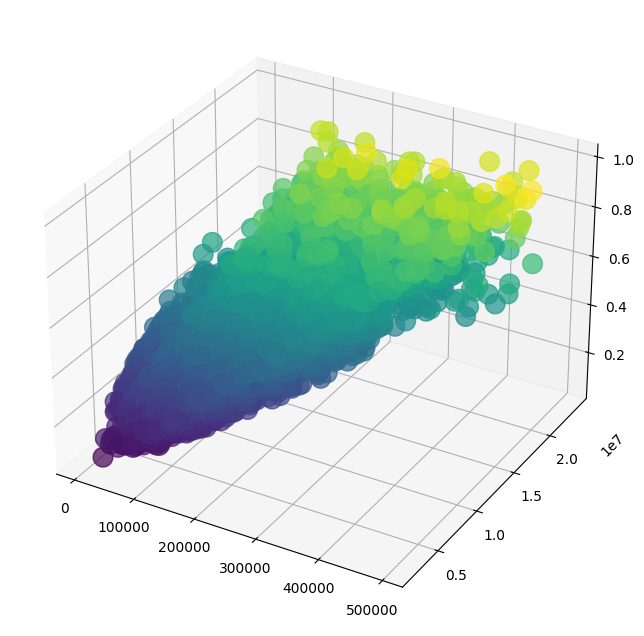

In [62]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = df['COMMIS']
y = df['SALES_PRICE']
z = df['REG_FEE']
ax.scatter(x, y, z,
           marker='o',
           linewidths=1, alpha=.7,
#            edgecolor='k',
           s = 200,
           c=z)
plt.show()

### Data prep to feed model

# Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
df_label_encoded = df.copy()

In [65]:
df_label_encoded.head(3)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House_Age
0,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,All Pub,Paved,A,380000,144400,7600000,44
1,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,All Pub,Gravel,RH,760122,304049,21717770,11
2,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,20


In [66]:
encoder = LabelEncoder()

In [67]:
df_label_encoded['AREA'] = encoder.fit_transform(df['AREA'])
df_label_encoded['AREA'].apply(lambda x : x + 1)

0       5
1       2
2       1
3       7
4       5
       ..
7098    5
7099    7
7100    7
7101    5
7102    7
Name: AREA, Length: 7103, dtype: int64

In [68]:
def string_categorical_data(cols, df):
    
    for col in cols:
        
        if type(df[col][0]) == str:
            df_label_encoded[col] = encoder.fit_transform(df[col])
            df_label_encoded[col].apply(lambda x : x + 1)

In [69]:
string_categorical_data(df_label_encoded.columns, df_label_encoded)

In [70]:
df_label_encoded

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House_Age
0,4,1004,1.0,1.0,3,0,1,0,0,2,0,380000,144400,7600000,44
1,1,1986,2.0,1.0,5,0,0,0,0,0,3,760122,304049,21717770,11
2,0,909,1.0,1.0,3,0,1,0,1,0,4,421094,92114,13159200,20
3,6,1855,3.0,2.0,5,2,0,2,2,2,2,356321,77042,9630290,22
4,4,1226,1.0,1.0,3,0,1,2,0,0,1,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,4,598,1.0,1.0,2,1,0,2,1,1,5,208767,107060,5353000,49
7099,6,1897,3.0,2.0,5,2,1,2,2,1,3,346191,205551,10818480,9
7100,6,1614,2.0,1.0,4,3,0,1,2,0,2,317354,167028,8351410,29
7101,4,787,1.0,1.0,2,4,1,0,1,2,4,425350,119098,8507000,31


In [71]:
df_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7103 non-null   int32  
 1   INT_SQFT       7103 non-null   int64  
 2   N_BEDROOM      7103 non-null   float64
 3   N_BATHROOM     7103 non-null   float64
 4   N_ROOM         7103 non-null   int64  
 5   SALE_COND      7103 non-null   int32  
 6   PARK_FACIL     7103 non-null   int32  
 7   BUILDTYPE      7103 non-null   int32  
 8   UTILITY_AVAIL  7103 non-null   int32  
 9   STREET         7103 non-null   int32  
 10  MZZONE         7103 non-null   int32  
 11  REG_FEE        7103 non-null   int64  
 12  COMMIS         7103 non-null   int64  
 13  SALES_PRICE    7103 non-null   int64  
 14  House_Age      7103 non-null   int32  
dtypes: float64(2), int32(8), int64(5)
memory usage: 610.5 KB


In [72]:
label_encoded_data_correlation = df_label_encoded.corr()

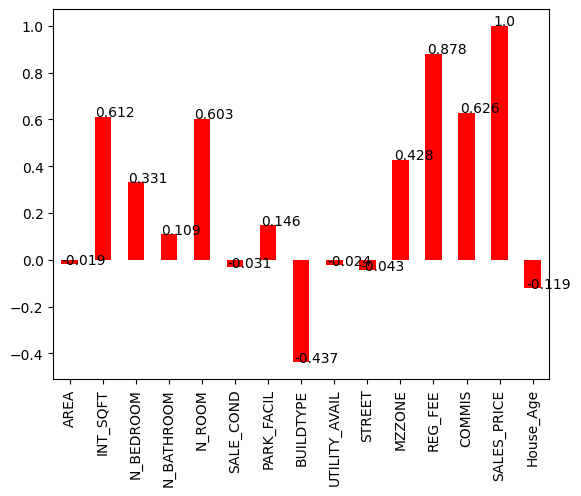

In [73]:

# Let's have a look at the label encoded data (AREA, SALE_COND, PARK_FACIL, BULIDTYPE, UTILITY_AVAIL, STREET, MZZONE)
label_encoded_corr_plot = label_encoded_data_correlation['SALES_PRICE'].plot(kind='bar', color='red')
for p in label_encoded_corr_plot.patches:
    label_encoded_corr_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [74]:
# From the above plot , let's exclude (AREA, SALE_COND, UTILITY_AVAIL, STREET)
df_label_encoded = df_label_encoded.drop(columns=['AREA', 'SALE_COND', 'UTILITY_AVAIL', 'STREET'])

In [75]:
df_label_encoded.head(4)

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House_Age
0,1004,1.0,1.0,3,1,0,0,380000,144400,7600000,44
1,1986,2.0,1.0,5,0,0,3,760122,304049,21717770,11
2,909,1.0,1.0,3,1,0,4,421094,92114,13159200,20
3,1855,3.0,2.0,5,0,2,2,356321,77042,9630290,22


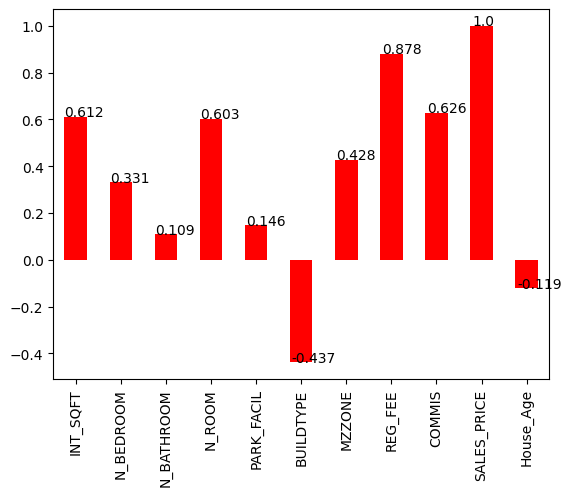

In [76]:
label_encoded_corr_plot = df_label_encoded.corr()['SALES_PRICE'].plot(kind='bar', color='red')
for p in label_encoded_corr_plot.patches:
    label_encoded_corr_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [77]:
X = df_label_encoded.drop(columns=['SALES_PRICE'])
x.shape

(7103,)

In [78]:
y = df_label_encoded['SALES_PRICE']

In [79]:
from sklearn.preprocessing import StandardScaler

#### Standardization

In [80]:
# label_scaler = StandardScaler()
# X_scaled = label_scaler.fit_transform(X)
# print(" scaled max", X_scaled.max(), "\n", "scaled min", X_scaled.min(), "\n", "scaled std", X_scaled.std())

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
label_encoded_scaler = StandardScaler()
label_encoded_scaler.fit(X_train)
X_train = label_encoded_scaler.transform(X_train)
X_test = label_encoded_scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
label_encoded_data_lin_reg = LinearRegression()

In [86]:
label_encoded_data_lin_reg.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = label_encoded_data_lin_reg.predict(X_test)
y_pred

array([ 8261859.50264884, 10079831.50710534, 11910139.23744722, ...,
        8797012.98302295,  6786669.9176709 , 11404614.97468916])

In [88]:
results = pd.DataFrame(columns=['ModelName', 'Label Encoded : R^2', 'One-Hot Encoded : R^2'])
results

,ModelName,Label Encoded : R^2,One-Hot Encoded : R^2


In [89]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [90]:
print("R^2  :", r2_score(y_test, y_pred).round(5))

R^2  : 0.87863


In [91]:
results.loc[len(results.index)] = ['Linear Regression', r2_score(y_test, y_pred).round(5), np.NaN]

In [92]:
results

,ModelName,Label Encoded : R^2,One-Hot Encoded : R^2
0,Linear Regression,0.87863,NaN


In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
label_encoded_data_log_reg = LogisticRegression()

In [95]:
label_encoded_data_log_reg.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_pred = label_encoded_data_log_reg.predict(X_test)
y_pred

array([11543750,  9429000, 12476770, ...,  9094750,  6583500, 11221720],
      dtype=int64)

In [97]:
print("R^2  :", r2_score(y_test, y_pred).round(5))

R^2  : 0.84036


In [98]:
results.loc[len(results.index)] = ['Logistic Regression', r2_score(y_test, y_pred).round(5), np.NaN]

In [99]:
results

,ModelName,Label Encoded : R^2,One-Hot Encoded : R^2
0,Linear Regression,0.87863,NaN
1,Logistic Regression,0.84036,NaN


# One-Hot Encoding

In [100]:
df.shape

(7103, 15)

In [101]:
df_one_hot_encoded = df.copy()

In [102]:
categorical_columns = [i for i in df_one_hot_encoded.columns if type(df_one_hot_encoded[i][0]) == str]

In [103]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7103 non-null   object
 1   SALE_COND      7103 non-null   object
 2   PARK_FACIL     7103 non-null   object
 3   BUILDTYPE      7103 non-null   object
 4   UTILITY_AVAIL  7103 non-null   object
 5   STREET         7103 non-null   object
 6   MZZONE         7103 non-null   object
dtypes: object(7)
memory usage: 388.6+ KB


In [104]:
categorical_columns

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [105]:
for category in categorical_columns[:]:
    df_one_hot_encoded = pd.concat([df_one_hot_encoded, pd.get_dummies(df_one_hot_encoded[category])], axis=1).drop(columns=[category])

In [106]:
df_one_hot_encoded.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,House_Age,Adyar,Anna Nagar,...,NoSeWa,Gravel,No Access,Paved,A,C,I,RH,RL,RM
0,1004,1.0,1.0,3,380000,144400,7600000,44,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,2.0,1.0,5,760122,304049,21717770,11,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,1.0,1.0,3,421094,92114,13159200,20,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,3.0,2.0,5,356321,77042,9630290,22,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,1.0,1.0,3,237000,74063,7406250,30,0,0,...,0,1,0,0,0,1,0,0,0,0


In [107]:
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INT_SQFT     7103 non-null   int64  
 1   N_BEDROOM    7103 non-null   float64
 2   N_BATHROOM   7103 non-null   float64
 3   N_ROOM       7103 non-null   int64  
 4   REG_FEE      7103 non-null   int64  
 5   COMMIS       7103 non-null   int64  
 6   SALES_PRICE  7103 non-null   int64  
 7   House_Age    7103 non-null   int32  
 8   Adyar        7103 non-null   uint8  
 9   Anna Nagar   7103 non-null   uint8  
 10  Chrompet     7103 non-null   uint8  
 11  KK Nagar     7103 non-null   uint8  
 12  Karapakkam   7103 non-null   uint8  
 13  T Nagar      7103 non-null   uint8  
 14  Velchery     7103 non-null   uint8  
 15  AbNormal     7103 non-null   uint8  
 16  Adj Land     7103 non-null   uint8  
 17  Family       7103 non-null   uint8  
 18  Normal Sale  7103 non-null   uint8  
 19  Partia

In [108]:
df_one_hot_encoded.corr()['SALES_PRICE'][:7]

INT_SQFT       0.612026
N_BEDROOM      0.330933
N_BATHROOM     0.108884
N_ROOM         0.602637
REG_FEE        0.878126
COMMIS         0.626413
SALES_PRICE    1.000000
Name: SALES_PRICE, dtype: float64

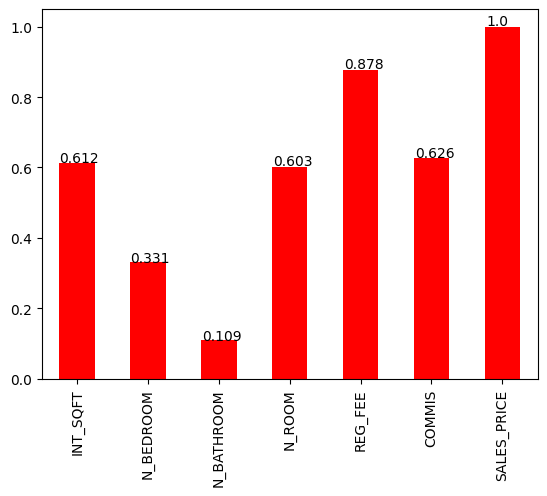

In [109]:
one_hot_encoded_corr_plot = df_one_hot_encoded.corr()['SALES_PRICE'][:7].plot(kind='bar', color='red')
for p in one_hot_encoded_corr_plot.patches:
    one_hot_encoded_corr_plot.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [110]:
X = df_one_hot_encoded.drop(columns=['SALES_PRICE'])
y = df_one_hot_encoded['SALES_PRICE']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
one_hot_scaler = StandardScaler()

In [113]:
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INT_SQFT     7103 non-null   int64  
 1   N_BEDROOM    7103 non-null   float64
 2   N_BATHROOM   7103 non-null   float64
 3   N_ROOM       7103 non-null   int64  
 4   REG_FEE      7103 non-null   int64  
 5   COMMIS       7103 non-null   int64  
 6   SALES_PRICE  7103 non-null   int64  
 7   House_Age    7103 non-null   int32  
 8   Adyar        7103 non-null   uint8  
 9   Anna Nagar   7103 non-null   uint8  
 10  Chrompet     7103 non-null   uint8  
 11  KK Nagar     7103 non-null   uint8  
 12  Karapakkam   7103 non-null   uint8  
 13  T Nagar      7103 non-null   uint8  
 14  Velchery     7103 non-null   uint8  
 15  AbNormal     7103 non-null   uint8  
 16  Adj Land     7103 non-null   uint8  
 17  Family       7103 non-null   uint8  
 18  Normal Sale  7103 non-null   uint8  
 19  Partia

In [114]:
one_hot_scaler.fit(X_train)

StandardScaler()

In [115]:
X_train = one_hot_scaler.transform(X_train)
X_test = one_hot_scaler.transform(X_test)

In [116]:
one_hot_lin_reg = LinearRegression()

In [117]:
one_hot_lin_reg.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = one_hot_lin_reg.predict(X_test)
y_pred

array([ 7787341.67485907, 11220301.67485907, 12815693.67485907, ...,
        7568727.95085089,  7451991.95085089, 11179351.95085089])

In [119]:
print("R^2  :", r2_score(y_test, y_pred).round(5))

R^2  : 0.96818


In [120]:
results.loc[0,'One-Hot Encoded : R^2'] =  r2_score(y_test, y_pred).round(5)

In [121]:
results

,ModelName,Label Encoded : R^2,One-Hot Encoded : R^2
0,Linear Regression,0.87863,0.96818
1,Logistic Regression,0.84036,NaN


In [122]:
one_hot_log_reg = LogisticRegression()

In [123]:
one_hot_log_reg.fit(X_train, y_train)

LogisticRegression()

In [129]:
X_test

array([[ 0.4895914 ,  0.44691559,  1.93026386, ..., -0.5787252 ,
        -0.59814263, -0.5932863 ],
       [-0.52320032, -0.79396614, -0.51806389, ...,  1.7279358 ,
        -0.59814263, -0.5932863 ],
       [ 0.78144965, -0.79396614, -0.51806389, ...,  1.7279358 ,
        -0.59814263, -0.5932863 ],
       ...,
       [-1.43362384, -0.79396614, -0.51806389, ..., -0.5787252 ,
        -0.59814263,  1.68552686],
       [-1.08513636, -0.79396614, -0.51806389, ..., -0.5787252 ,
        -0.59814263,  1.68552686],
       [ 0.97747386,  1.68779732,  1.93026386, ..., -0.5787252 ,
        -0.59814263,  1.68552686]])

In [124]:
y_pred = one_hot_log_reg.predict(X_test)
y_pred

array([ 6997500,  9459500, 11671660, ...,  7695240,  7913300, 11095180],
      dtype=int64)

In [125]:
print("R^2  :", r2_score(y_test, y_pred).round(5))

R^2  : 0.82515


In [126]:
results.loc[1,'One-Hot Encoded : R^2'] =  r2_score(y_test, y_pred).round(5)

In [127]:
results

,ModelName,Label Encoded : R^2,One-Hot Encoded : R^2
0,Linear Regression,0.87863,0.96818
1,Logistic Regression,0.84036,0.82515


In [128]:
X_train.shape

(4759, 36)